# Сборный проект - Анализ игровой индустрии


***Описание проекта:***  
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.Перед нами данные до 2016 года. Нужно отработать принцип работы с данными.

В данном иследование я проверю данные на ошибки и исправлю их при необходимости, затем проведу статистические исследования и выявлю характерные признаки поведения пользователей, в завершающей части проверю несколько гипотез о равенстве признаков.

***Описание данных:***  
•	Name — название игры  
•	Platform — платформа  
•	Year_of_Release — год выпуска  
•	Genre — жанр игры  
•	NA_sales — продажи в Северной Америке (миллионы проданных копий)  
•	EU_sales — продажи в Европе (миллионы проданных копий)  
•	JP_sales — продажи в Японии (миллионы проданных копий)  
•	Other_sales — продажи в других странах (миллионы проданных копий)  
•	Critic_Score — оценка критиков (максимум 100)  
•	User_Score — оценка пользователей (максимум 10)  
•	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

  

**ПЛАН РАБОТЫ:**
1. [Открытие данных](#1)
2. [Подготовка данных](#2)
3. [Анализ данных](#3)
4. [Проверка гипотез](#4)
5. [Проверка гипотез](#5)
5. [Общий вывод](#6)


<a id="1"></a>
## Открытие файла с данными и изучение общей информации

In [1]:
#Библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats as st
import seaborn as sns

In [2]:
# загрузим файл
import pandas as pd
df = pd.read_csv('/datasets/games.csv')

In [3]:
# посмотрим первые 10 строк
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# посмотрим всю информацию о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


***Пропуски:***  
•	Name — название игры  
•	Year_of_Release — год выпуска  
•	Genre — жанр игры  
•	Critic_Score — оценка критиков (максимум 100)  
•	User_Score — оценка пользователей (максимум 10)  
•	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).


***Тип данных: столбец - нужный тип***  
•	Year_of_Release — int64  
•	Critic_Score — int64  
•	User_Score — float64  


<a id="2"></a>
## Подготовка данных

### Замена названия столбцов

In [5]:
#Заменяем названия столбцов (приведем к нижнему регистру)
df.columns = df.columns.str.lower()

In [6]:
#проверка
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработка пропусков

In [7]:
#посмотрим сколько всего пропусков в каждом столбце в %
(df.isna().sum()/len(df['platform']))*100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

In [8]:
#проверка взаимосвязи пропусков 2-х столбцов (одинаковое кол-во пропусков)
df[(df['name'].isnull()) & (df['genre'].isnull())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
# удалим эти 2 строки: их отсутствие не исказят наши данные
df = df.dropna(subset=['name'])

In [10]:
# проверка
df.query('genre.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [11]:
unik_years=df['year_of_release'].unique()
unik_years

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [12]:
# удалим пропуски. их всего -1.5%, поэтому удаление их не исказят наш результат
df.dropna(subset = ['year_of_release'], inplace = True) 

In [13]:
# посмотрим где у нас значение "tbd"
#df.query('user_score == "tbd"' or 'critic_score == "tbd"' or 'rating == "tbd"')

In [14]:
#df.query('critic_score == "tbd"')

In [15]:
#df.query('rating == "tbd"')

In [16]:
# значит, все эти значения только тут
tbd= df.query('user_score == "tbd"')
tbd.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E


In [17]:
# заменяем на пустые значения
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

tbd - это "To Be Determined" рейтинг не определен, поэтому заменяем значения на пустые значения

In [18]:
#df['user_score'].unique()

In [19]:
# заполняем пропуск на значение "undefined"
df['rating'] = df['rating'].fillna('undefined')


In [20]:
#df.head()

### Добавление отдельного столбца ('sum_sales' - суммарные продажи во всех регионах)


In [21]:
df['sum_sales']= df.na_sales+df.eu_sales+df.jp_sales+df.other_sales
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


### Замена типа данных

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null object
rating             16444 non-null object
sum_sales          16444 non-null float64
dtypes: float64(7), object(5)
memory usage: 1.6+ MB


In [23]:
#меняем типы данных
df['year_of_release'] = df['year_of_release'].astype('int')
df['user_score'] = df['user_score'].astype('float64')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             16444 non-null object
sum_sales          16444 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [25]:
# проверим наличие дубликатов
df.duplicated().sum()

0

### Вывод:   
Привели нашу таблицу в порядок:  
1. Привели название столбцов к нижнему регистру.  
2. Избавились от пропусков: удалили в столбцах - там где их очень мало; заменили на маркеры для удобства замены типа данных, но удалять их было нельзя, т.к. это испортит нашу статистику.  
3. Добавили отдельный столбец'sum_sales'.  
4. Заменили тип данных. 


<a id="3"></a>
## Исследовательский анализ данных

### Cколько игр выпускалось в разные годы? Важны ли данные за все периоды?

Text(0, 0.5, 'Количество игр, млн. проданных копий')

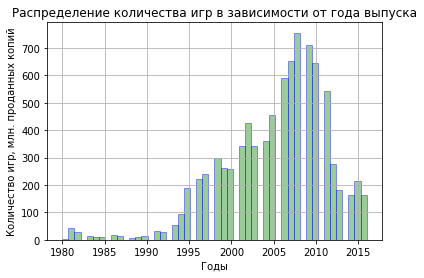

In [26]:
# создадим сводную таблицу по названию игры и году выпуска
years_of_name=df.pivot_table(index='name', values='year_of_release', aggfunc='sum')
# построим гисторграмму по сводной таблице
years_of_name.hist(bins=50, range=(1980,2016), ec='blue', alpha = 0.4, color='green')
plt.title('Распределение количества игр в зависимости от года выпуска')
plt.xlabel('Годы')
plt.ylabel('Количество игр, млн. проданных копий')


#### Вывод:  
Начинается наш период с 1980 года. До 1995 года продавались тяжело игры, больше 100 млн. игр не продавалось. После 1995 года наблюдается постепенный рост продаж. Примерно с 2008 года, где было проданно около 760 млн.проданных копий, наблюдается уже спад. И в 2015 "докатились" до продаж порядка 200 млн.шт.

### Как менялись продажи по платформам?  Выбор платформ с наибольшими суммарными продажами и построение распределения по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [27]:
# создадим сводную таблицу по нужным столбцам таблицы
platform_pivot=df.pivot_table('sum_sales', 
                index = 'platform', 
                aggfunc = 'sum').sort_values(by = 'sum_sales', ascending = False).head(20)
platform_pivot



,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


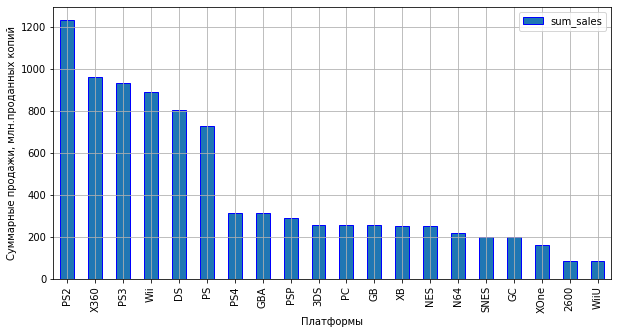

In [28]:
# нарисуем столбчатую диаграмму
platform_pivot.plot(kind='bar',figsize=(10, 5), grid=True, ec='blue')
plt.ylabel('Суммарные продажи, млн.проданных копий')
plt.xlabel('Платформы')
plt.show()


In [29]:
# выберем первые 6 лидеров, т.к. затем значения сильно упали почти в 2 раза
platform_best=platform_pivot.head(6)
platform_best

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58


In [30]:
# создадим список лучших платформ
platform_best6 =platform_pivot.head(6).index.to_list()

In [31]:
# сделаем сводную таблицу с лучшими платфорами
platform_best6_pivot=df.query('platform.isin(@platform_best6)').pivot_table(index='year_of_release', 
                                                                            columns='platform', 
                                                                            values='sum_sales', 
                                                                            aggfunc='sum')
#platform_best6_pivot


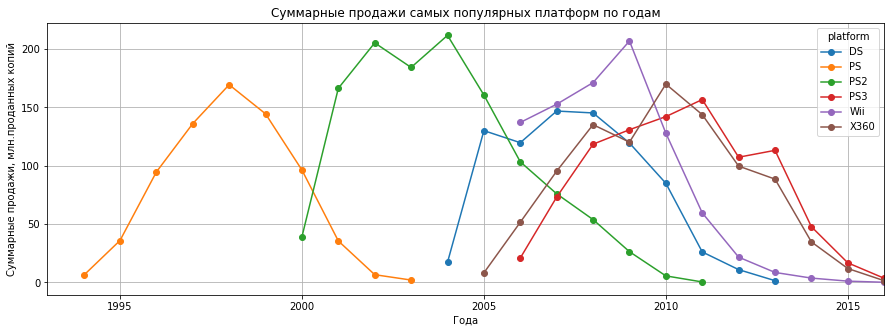

In [32]:
platform_best6_pivot.plot(grid=True, figsize=(15, 5), style ='o-')
plt.xlim(1993, 2016)
plt.title('Суммарные продажи самых популярных платформ по годам')
plt.ylabel('Суммарные продажи, млн.проданных копий')
plt.xlabel('Года')
plt.show()

#### Вывод
По графику видим, что платформа появляется и исчезает, примерный жизненный цикл одной игры - 10 лет.
Видимо, это связано с выпуском новой игры, т.е. появилась новая игра и спрос на старую постепенно падает. Это хорошо видно на старте продаж PS4 \ XOne, когда продажи X360 \ PS3 начинают падать, т.е. нам достаточно взять период с 2013-14 года. Но...

###  Данные за соответствующий актуальный период. Определение актуального периода. 

У нас на срок жизни платформы приходится как спад, так и падение, они занимают + - примерно одинаковое время. Высчитаем примерно актуальный период: 2017 - 10(период жизни одной игры) \ 2 = 2012. Таким образом, можно взять период после 2012.

In [33]:
yers_after2005 = df.query('2012<year_of_release')

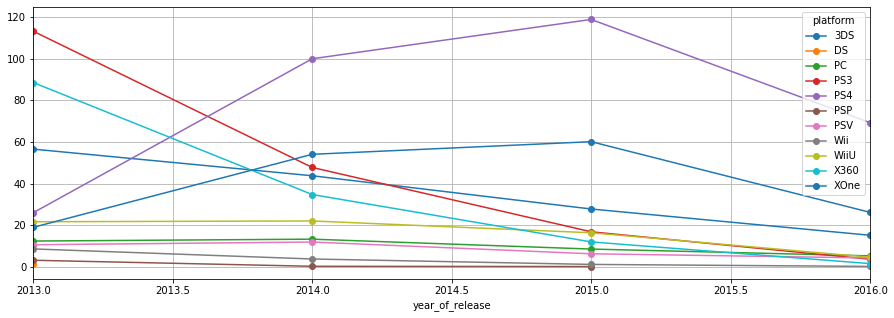

In [34]:
yers_after2005.pivot_table(index='year_of_release', 
                           columns='platform', 
                           values='sum_sales', 
                           aggfunc='sum').plot(grid=True, figsize=(15, 5), style ='o-')
plt.show()

#### Вывод:  
Наблюдается медленный спад актуальности платформ. Но есть хорошие новости: рост 2 платформ - PS4 и XOne.


### Какие платформы лидируют по продажам, растут или падают? Выбор нескольких потенциально прибыльных платформ.

In [35]:
platform_best10=platform_pivot.head(10).index.to_list()

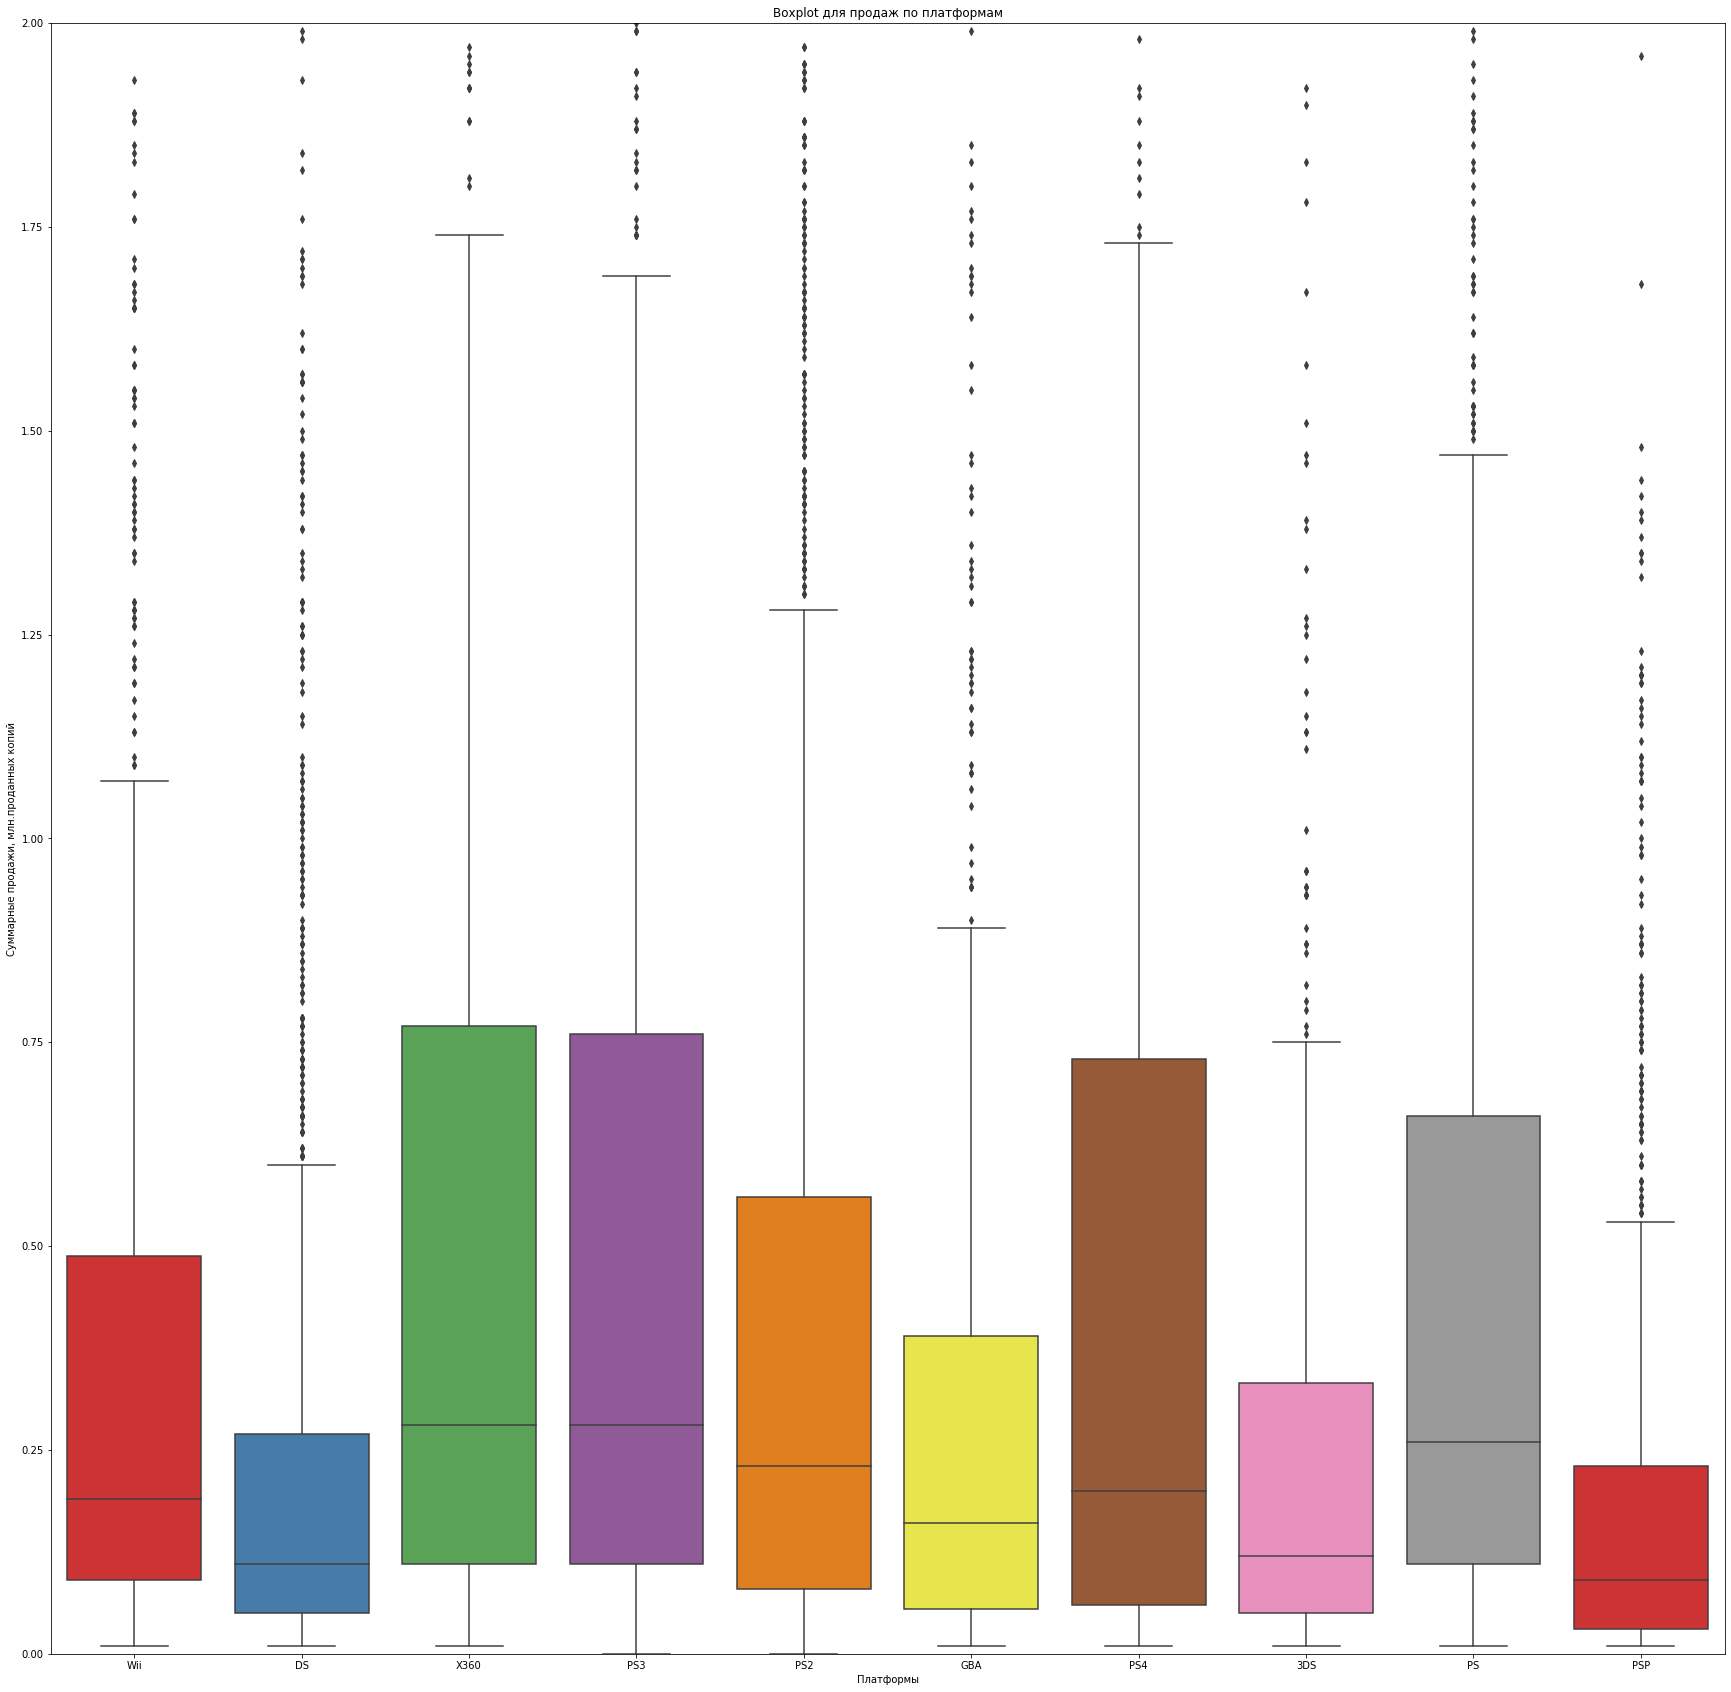

In [36]:
# построим ящик с усами для 10 лидеров платформ
plt.figure(figsize=(30,30))
box_all = sns.boxplot(x="platform", y="sum_sales", data=df.query('platform.isin(@platform_best10)'), palette="Set1")
box_all.set(ylim=(0,2))
plt.ylabel('Суммарные продажи, млн.проданных копий')
plt.xlabel('Платформы')
plt.title('Boxplot для продаж по платформам')
plt.show()

Сложно мне тут сделать вывод. Совсем по-другому представляла "ящик с усами" PS2 -лидера. Представлялось, что ящик будет выше, или усы длиннее, или медиана выше. По этому графику, кажется, что лидеры X360 и PS4.

In [37]:
platform_best10_pivot=df.query('platform.isin(@platform_best10)').pivot_table(index='year_of_release', 
                                                                            columns='platform', 
                                                                            values='sum_sales', 
                                                                            aggfunc='sum')
#platform_best10_pivot


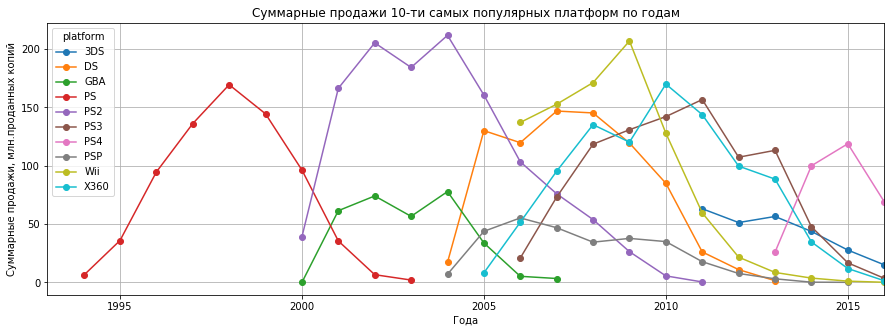

In [38]:
platform_best10_pivot.plot(grid=True, figsize=(15, 5), style ='o-')
plt.xlim(1993, 2016)
plt.title('Суммарные продажи 10-ти самых популярных платформ по годам')
plt.ylabel('Суммарные продажи, млн.проданных копий')
plt.xlabel('Года')
plt.show()

#### Вывод:
Самая первая игра PS выпустилась в 1993 году, была на пике своей популярности в 98 году, и после выхода в 2000 году новых игр PS2 и GBA выдохлась к 2003 году, PS2 и GBA ждала та же участь- всё было ничего , особенно у PS2, пока не вышла "молодежь"- DS, Wii,X360, PS3 и самая менее популярная из этого списка PSP. В 2013 году вышла новая игра - PS4, которая отняла всё внимание игроманов и уже в 2015 году ей не было равных. Но можем предположить, что и её популярность будет падать.


### График «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

У нас на 2016 год наиболее хорошо держатся на рынке PS4 \ XOne и портативная 3DS. Определим продажи по этим платформам как глобальные, чтобы примерно понять, как же продаются игры на наиболее свежих и перспективных платформах

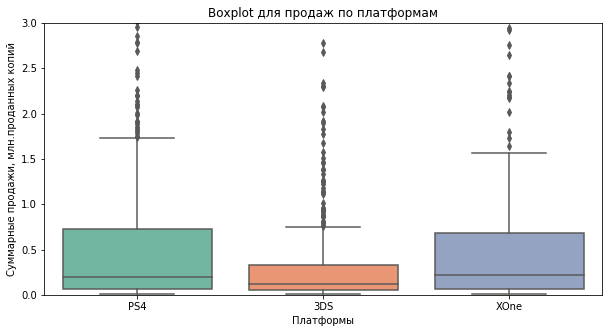

In [39]:
platform_best3=['PS4','XOne','3DS']
plt.figure(figsize=(10,5))
box_best6 = sns.boxplot(x="platform", y="sum_sales", data=df.query('platform.isin(@platform_best3)'), palette="Set2")
box_best6.set(ylim=(0,3))
plt.ylabel('Суммарные продажи, млн.проданных копий')
plt.xlabel('Платформы')
plt.title('Boxplot для продаж по платформам')
plt.show()

#### Вывод:
Медианные значения суммарных продаж данных платформ сильно не отличаются, 3-ие квартили и максимальные значения платформ PS4 и XOne, узкий "ящик" у платформы DS.


### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?Диаграмма рассеяния и посчитайте корреляцию между отзывами и продажами. 

#### Влияние отзывов пользователей на продажи

In [40]:
# Возьмем самую популяhную платформу PS2 и рейтинги, не забываем про маркеры, которые нужно исключить
platform_best_user = df.query('platform == "PS2"')
platform_best_user_loc = platform_best_user.loc[:, ['user_score','sum_sales']]
display(platform_best_user_loc.corr())
#display(platform_best_user['sum_sales'].corr(platform_best_user['user_score']))



,user_score,sum_sales
user_score,1.000000,0.175055
sum_sales,0.175055,1.000000


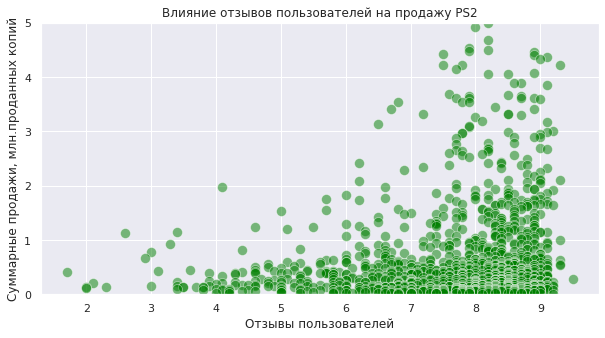

In [41]:
sns.set(rc={'figure.figsize':(10,5)}) #задаем размер графика
ax = sns.scatterplot(x="user_score", y="sum_sales", data= platform_best_user, 
                     alpha=0.5, color='green', s = 100)
ax.set(ylim=(0,5))
plt.ylabel('Суммарные продажи, млн.проданных копий')
plt.xlabel('Отзывы пользователей')
plt.title('Влияние отзывов пользователей на продажy PS2')
plt.show()


##### Вывод:
Корреляция в 0.17 говорит о том, что связь минимальна, т.е её почти нет. Но судя по графику можно сделать вывод, что чем выше оценка, тем больше продаж.

#### Влияние отзывов критиков на продажи

In [42]:
# Возьмем самую популяhную платформу PS2 и рейтинги, не забываем про маркеры, которые нужно исключить
platform_best_critic = df.query('platform == "PS2"')
platform_best_critic_loc = platform_best_critic.loc[:, ['critic_score','sum_sales']]
display(platform_best_critic_loc.corr())


,critic_score,sum_sales
critic_score,1.000000,0.392536
sum_sales,0.392536,1.000000


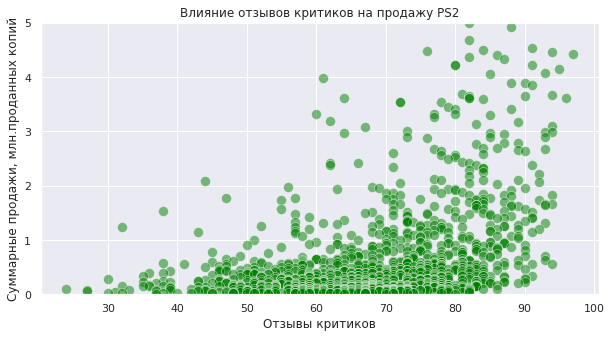

In [43]:
sns.set(rc={'figure.figsize':(10,5)}) #задаем размер графика
ax = sns.scatterplot(x="critic_score", y="sum_sales", data= platform_best_critic, 
                     alpha=0.5, color='green', s = 100)
ax.set(ylim=(0,5))
plt.ylabel('Суммарные продажи, млн.проданных копий')
plt.xlabel('Отзывы критиков')
plt.title('Влияние отзывов критиков на продажy PS2')
plt.show()

##### Вывод:
Корреляция в 0,39 говорит о наличии связи, однако не слишком сильной. Но и тут по графику можно сделать вывод, что чем выше оценка, тем больше продаж.

### Соотношение выводов с продажами игр на других платформах.

#### Зависимость от отзывов пользователей

In [44]:
# создадим список из 2 средних и 2 низкие по кол-ву продаж платформы
platform_mean4 =['PS4', 'GBA', 'SNES', 'WiiU']

In [45]:
# Возьмем этот список и рейтинги, не забываем про маркеры, которые нужно исключить
platform_mean4_user = df.query('platform.isin(@platform_mean4)')
platform_mean4_loc = platform_mean4_user.loc[:, ['user_score','sum_sales']]
display(platform_mean4_loc.corr())

,user_score,sum_sales
user_score,1.0000,0.0286
sum_sales,0.0286,1.0000


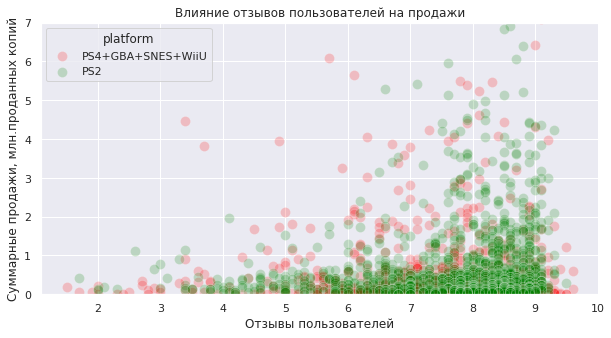

In [46]:
# изобразим 2 графика на одном - зависимости отзывов пользователей от продаж платформ -mean4 и PS2.
sns.set(rc={'figure.figsize':(10,5)}) #задаем размер графика
mean4 = sns.scatterplot(x="user_score", y="sum_sales", data= platform_mean4_loc, 
                     alpha=0.2, color='red', s = 100)
best = sns.scatterplot(x="user_score", y="sum_sales", data= platform_best_user_loc, 
                     alpha=0.2, color='green', s = 100)
mean4.set(ylim=(0,7))
plt.legend(title='platform', labels=['PS4+GBA+SNES+WiiU','PS2'])
plt.ylabel('Суммарные продажи, млн.проданных копий')
plt.xlabel('Отзывы пользователей')
plt.title('Влияние отзывов пользователей на продажи')
plt.show()


##### Вывод:
Корреляция для произвольно выбранных платформ (mean4) в 0,02 говорит об отсутствии зависимости влияния отзывов.  
Продаж от одной платформы PS2 больше, чем от 4-х произвольно выбранных.

#### Зависимость от отзывов критиков

In [47]:
# тот же спиоск 4-х платформ и уже оценка критиков
platform_mean4_critic = df.query('platform.isin(@platform_mean4)')
platform_mean4_critic_loc = platform_mean4_critic.loc[:, ['critic_score','platform', 'sum_sales']]
display(platform_mean4_critic_loc.corr())

,critic_score,sum_sales
critic_score,1.000000,0.333486
sum_sales,0.333486,1.000000


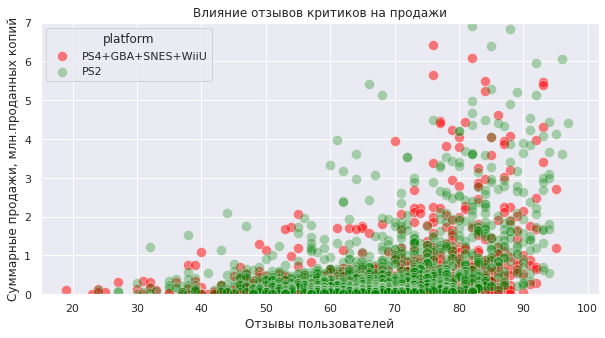

In [48]:
# изобразим 2 графика на одном - зависимости отзывов критиков от продаж платформ -mean4 и PS2.
sns.set(rc={'figure.figsize':(10,5)}) #задаем размер графика
bx = sns.scatterplot(x="critic_score", y="sum_sales", data= platform_mean4_critic_loc, 
                     alpha=0.5, color='red', s = 100)
ax = sns.scatterplot(x="critic_score", y="sum_sales", data= platform_best_critic_loc, 
                     alpha=0.3, color='green', s = 100)
ax.set(ylim=(0,7))
plt.legend(title='platform', labels=['PS4+GBA+SNES+WiiU','PS2'])
plt.ylabel('Суммарные продажи, млн.проданных копий')
plt.xlabel('Отзывы пользователей')
plt.title('Влияние отзывов критиков на продажи')
plt.show()

##### Вывод:
Корреляция для произвольно выбранных платформ (mean4) в 0,33 говорит о малой зависимости влияния отзывов критиков на их продажи. 
Продаж от одной платформы PS2 больше, чем от 4-х произвольно выбранных.

### Общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [49]:
# сделаем сводную по жанрам и продажам, отсортируем, чтобы увидеть самые прибыльные
genre_pivot=df.pivot_table('sum_sales', 
                index = 'genre', 
                aggfunc = ['sum','count','mean'])
                           
genre_pivot

,sum,count,mean
,sum_sales,sum_sales,sum_sales
genre,,,
Action,1716.52,3307,0.519057
Adventure,233.33,1293,0.180456
Fighting,442.66,837,0.528865
Misc,790.29,1721,0.459204
Platform,825.55,878,0.940262
Puzzle,239.89,569,0.421599
Racing,723.49,1226,0.590122
Role-Playing,931.08,1481,0.628683


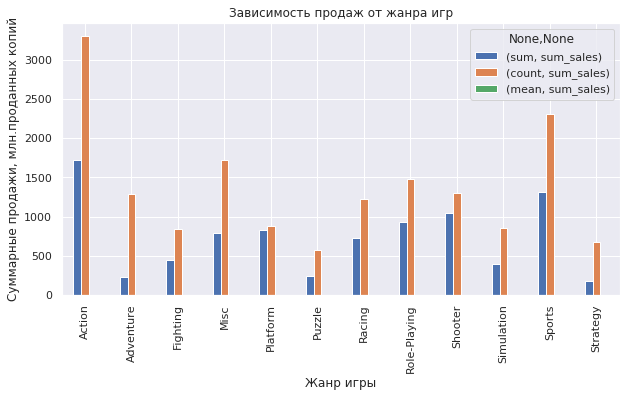

In [50]:
# нарисуем столбчатую диаграмму
genre_pivot.plot(kind='bar')                         
plt.title('Зависимость продаж от жанра игр')
plt.ylabel('Суммарные продажи, млн.проданных копий')
plt.xlabel('Жанр игры')
plt.show()

#### Вывод:
С большим отрывом лидирует жанр по кол-ву продаж и сумме продаж- Action. на 2-м месте - Sports...Менее популярны - Puzzle, Adventure, Strategy. По среднему колву продаж лидируют - Platform, Shooter, Role-Playing.

<a id="4"></a>
## Портрет пользователя каждого региона

### Самые популярные платформы (топ-5). Описание различий в долях продаж.

In [51]:
# создадим список регионов
regions = ['na_sales','eu_sales','jp_sales']
df_since2012=df.query('year_of_release >= 2012')

In [52]:
# посмотрим для себя где и как продается всё
print("Суммарные продажи, млн.проданных копий в регионе")
for reg in regions:
    sum_region=df_since2012[reg].sum()     
    print(reg, round(sum_region))

Суммарные продажи, млн.проданных копий в регионе
na_sales 591
eu_sales 507
jp_sales 193


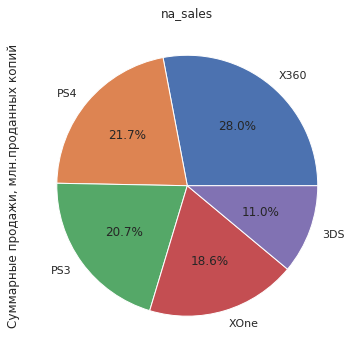

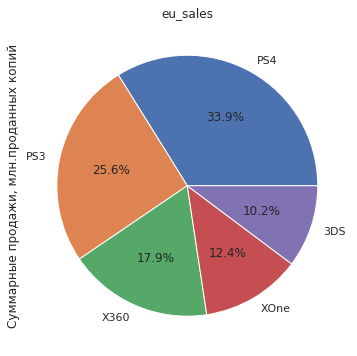

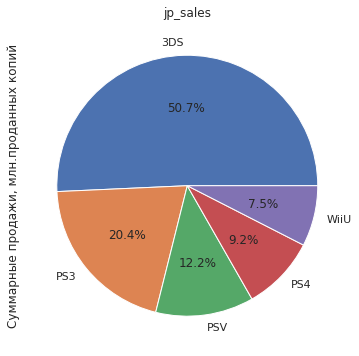

In [53]:
# создадим цикл для быстрого вывода для каждого региона
for reg in regions:
    (df_since2012.pivot_table(index='platform', values=reg, aggfunc='sum')
                .sort_values(reg, ascending=False).head(5)
                .plot(kind='pie', y=reg, figsize=(6, 6), legend=False, title = reg, autopct='%1.1f%%')
                .set(ylabel='Суммарные продажи, млн.проданных копий')
    )
    plt.show()

#### Вывод:
У жителей данных регионов разные предпочтения в выборе платформ.
Самая популярная в Северной Америке - X360, В Европе - PS4, в Японии c существенным отрывом- 3DS.

### Самые популярные жанры (топ-5). Поясните разницу.

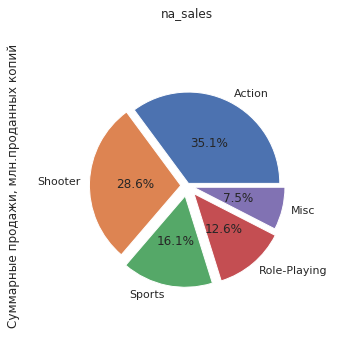

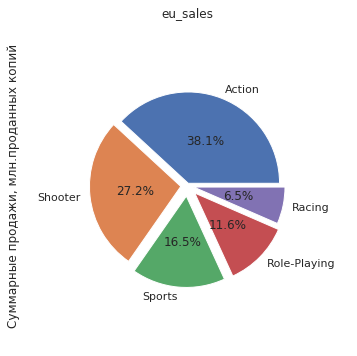

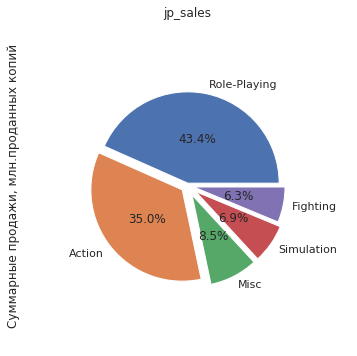

In [54]:
for reg in regions:
    (df_since2012.pivot_table(index='genre', values=reg, aggfunc='sum')
                .sort_values(reg, ascending=False).head(5)
                .plot(kind='pie', y=reg, figsize=(6, 6), legend=False, pctdistance=0.5, 
                      labeldistance=1.1, radius=0.7, title = reg, autopct='%1.1f%%', explode = [0.02, 0.05, 0.08, 0.08, 0.05])
                .set(ylabel='Суммарные продажи, млн.проданных копий')
    )
    plt.show()

#### Вывод:
Самый популярный жанр в Северной Америке и в Европе - Action, а в Японии- Pole-Playing.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [55]:
#посмотрим уникальные значения
spisok_raiting=df['rating'].unique()
spisok_raiting

array(['E', 'undefined', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [56]:
# создадим новый список с расшифрованными названиями
new_raiting=['Для всех', 'undefined', 'Для взрослых', 'Подросток','Для всех от 10 лет и старше','Для детей – для тех, кто уже научился говорить и держать джойстик','Только для взрослых','Для детей младшего возраста','Рейтинг ожидается']
new_raiting

['Для всех',
 'undefined',
 'Для взрослых',
 'Подросток',
 'Для всех от 10 лет и старше',
 'Для детей – для тех, кто уже научился говорить и держать джойстик',
 'Только для взрослых',
 'Для детей младшего возраста',
 'Рейтинг ожидается']

In [57]:
# сделаем замену значений в столбце 
df['rating'] = df['rating'].replace(spisok_raiting, new_raiting)
print(df['rating'].unique())

['Для всех' 'undefined' 'Для взрослых' 'Подросток'
 'Для всех от 10 лет и старше'
 'Для детей – для тех, кто уже научился говорить и держать джойстик'
 'Только для взрослых' 'Для детей младшего возраста' 'Рейтинг ожидается']


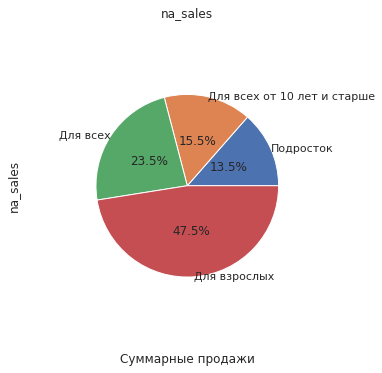

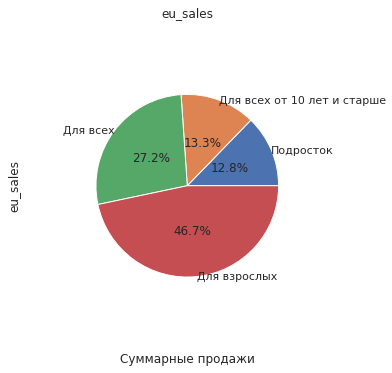

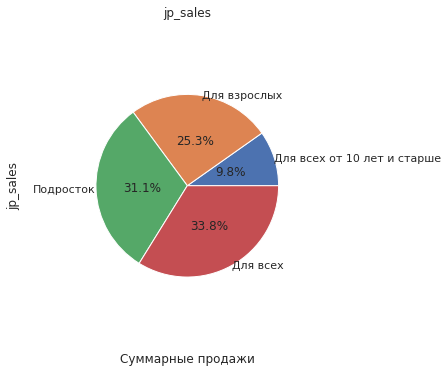

In [58]:
rating_actual= df.query('rating != "undefined" and rating != "Рейтинг ожидается" and year_of_release >= 2012')
for reg in regions:
    (rating_actual.pivot_table(index='rating', values=reg, aggfunc='sum')
                .sort_values(reg, ascending=True).tail(5)
                .plot(kind='pie', y=reg, figsize=(6, 6), legend=False, pctdistance=0.5, 
                      labeldistance=1, radius=0.7, title = reg, autopct='%1.1f%%')
                .set(xlabel='Суммарные продажи')
    )
    plt.show()

#### Вывод:
В Северной Америке и в Европе предпочитают рейтинги "Для взрослых", в Японии "Для всех".

### Вывод:
Портреты пользователей из каждого региона:  

Средне-статистический пользователь из Северной Америки пользуется, в основном, платформами X360 и PS4, предпочитает игровые жанры "Action" и "Shoter" и игры с рейтингом "Для взрослых".

Средне-статистический пользователь из Европы предпочитает платформы PS4 и PS3, жанры "Action" и "Shoter" и игры с рейтингом "Для взрослых".

Средне-статистический пользователь из Японии отдает своё предпочтение платформе 3DS, жанру "Role-Playing" и "Action", рейтингу "Для всех". 



<a id="5"></a>
## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?

In [59]:
#выберем пользовательские рейтинги платформ Xbox One 
user_score_xone= df.query('platform == "XOne" and user_score!="nan" and year_of_release >= 2012') 
#выберем пользовательские рейтинги платформ Xbox One и PC
user_score_pc = df.query('platform == "PC" and user_score!="nan" and year_of_release >= 2012')  

In [60]:
var_xone = np.var(user_score_xone['user_score'])
var_pc= np.var(user_score_pc['user_score'])
print('{:} {: >5.2f} '.format('Дисперсия платформ Xbox One равна:', var_xone))
print('{:} {: >11.2f} '.format('Дисперсия платформ PC равна:', var_pc ))



Дисперсия платформ Xbox One равна:  1.90 
Дисперсия платформ PC равна:        2.76 


Формулировки гипотез:  
    H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
    H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.
        
Для проверки гипотезы возьмем стандартное значение alpha = 0.05

In [61]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    user_score_xone['user_score'],
    user_score_pc['user_score'],
    equal_var= False  # так как дисперсии генеральных совокупностей, из которых взяты выборки, не равны
    #equal_var= True # для сравнения результата (что будет когда  True)
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, т.е. средние пользовательские рейтинги платформ Xbox One и PC различаются!")
else:
    print("Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC одинаковы!")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC одинаковы!


In [62]:
# сравним средние оценки
print('{:} {: >5.2f} '.format("Средний пользовательский рейтинг платформ Xbox One:", user_score_xone['user_score'].mean() ))
print('{:} {: >11.2f} '.format("Средний пользовательский рейтинг платформ PC:",user_score_pc['user_score'].mean() ))


Средний пользовательский рейтинг платформ Xbox One:  6.52 
Средний пользовательский рейтинг платформ PC:        6.43 


####  Вывод:  
Средние пользовательские рейтинги платформ Xbox One и PC статистически одинаковы!
 Полученное значение p-value говорит о том, что с вероятностью в почти 55 % такое или большее различие можно получить случайно. Это большая вероятность, чтобы делать вывод о значимом различии между средними пользовательскими рейтингами.  
 Из "ручного" сравнения видно, что cредние пользовательские рейтинги платформ Xbox One и PC действительно очень близки по своим значениям и наша гипотеза подтвердила это.



### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные?

In [63]:
#выберем пользовательские рейтинги жанров Action и Sports
user_score_action= df.query('genre == "Action" and user_score!="nan" and year_of_release >= 2012') 
#выберем пользовательские рейтинги платформ Xbox One и PC
user_score_sports = df.query('genre == "Sports" and user_score!="nan" and year_of_release >= 2012')  

In [64]:
var_action = np.var(user_score_action['user_score'])
var_sports= np.var(user_score_sports['user_score'])
print('{:} {: >5.2f} '.format('Дисперсия жанра Action равна:', var_action))
print('{:} {: >5.2f} '.format('Дисперсия жанра Sports равна:', var_sports))

Дисперсия жанра Action равна:  1.89 
Дисперсия жанра Sports равна:  3.01 


Формулировки гипотез:  
    H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.  
    H1: Средние пользовательские рейтинги жанров Action и Sport разные.
        
Для проверки гипотезы возьмем стандартное значение alpha = 0.05

In [65]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    user_score_action['user_score'],
    user_score_sports['user_score'],
    equal_var= False  # так как дисперсии генеральных совокупностей, из которых взяты выборки, не равны
    #equal_var= True # для сравнения результата (что будет когда  True)
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, т.е. cредние пользовательские рейтинги жанров Action и Sport разные!")
else:
    print("Не получилось отвергнуть нулевую гипотезу, т.е cредние пользовательские рейтинги жанров Action и Sports одинаковые!")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу, т.е. cредние пользовательские рейтинги жанров Action и Sport разные!


In [66]:
# сравним средние рейтинги
print('{:} {: >5.2f} '.format("Средний пользовательский рейтинг платформ Xbox One:", user_score_action['user_score'].mean() ))
print('{:} {: >11.2f} '.format("Средний пользовательский рейтинг платформ PC:",user_score_sports['user_score'].mean() ))


Средний пользовательский рейтинг платформ Xbox One:  6.83 
Средний пользовательский рейтинг платформ PC:        5.46 


####  Вывод:  
Средние пользовательские рейтинги жанров Action и Sports разные! 
Вероятность случайно получить такое отличие крайне мала.  
Из "ручного" сравнения видно, что cредние пользовательские рейтинги жанров Action и Sports действительно разные и наша гипотеза подтвердила это.

<a id="6"></a>
## Общий вывод:


Мы получили данные до 2016 года.
    Ознакомились с файлом: заметили пропуски и неверные типы данных в некоторых столбцах, 
обработали файл:  изменили названия всех столбцов – привели всё к нижнему регистру, 
удалили 2 пропуска в столбцах "Name", "Year_of_Release", обнаружили некорректное значение "tbd" в столбце "user_score" заменили на пропуск,  заменили пустые значения в столбцах ['user_score'] ,['critic_score'] ,['rating'] на удобное значение «-1» , данный маркер в дальнейшем будем исключать при анализе. Добавили отдельный столбе 'sum_sales' - суммарные продажи во всех регионах.
Сделали замену типов данных столбцов на нужный формат.  

   Провели исследовательский анализ:
Начинается наш период с 1980 года. До 1995 года продавались тяжело игры. После 1995 года наблюдается постепенный рост продаж. Примерно с 2008 года наблюдается уже спад. Жизненный цикл одной игры - 10 лет. Видимо, это связано с выпуском новой игры, т.е. появилась новая игра и спрос на старую постепенно падает. Определили актуальный период с 2005 года по 2015 год, т.к. данные за 2016 год могут быть неполными. За этот период наблюдается медленный спад актуальности платформ, и только рост 2 платформ - PS4 и XOne. Выделили 10 самых популярных игр: самая первая игра PS выпустилась в 1993 году, была на пике своей популярности в 98 году, и после выхода в 2000 году новых игр PS2 и GBA выдохлась к 2003 году, PS2 и GBA ждала та же участь- всё было ничего , особенно у PS2, пока не вышла "молодежь"- DS, Wii,X360, PS3 и самая менее популярная из этого списка- PSP. В 2013 году вышла новая игра - PS4, которая отняла всё внимание игроманов и уже в 2015 году ей не было равных. Но можем предположить, что и её популярность будет падать.  

   Построилиграфик «ящик с усами» по глобальным продажам игр в разбивке по платформам и выявили, что медианные значения суммарных продаж данных платформ сильно не отличаются, 3-ие квартили и максимальные значения платформ X360 и PS3, PS занимают самые высокие позиции по сравнению с остальными платформами, самый большой выброс значений и низкий 3-ий квартиль у платформы DS.
В среднем продажи коррелируют больше с оценкой критиков (в случае, когда оценка критиков выше 50), нежели с оценкой пользователей.  

   Составили портреты пользователей из каждого региона:
Средне-статистический пользователь из Северной Америки пользуется, в основном, платформами X360 и PS4, предпочитает игровые жанры "Action" и "Shoter" и игры с рейтингом "Для взрослых".

Средне-статистический пользователь из Европы предпочитает платформы PS4 и PS3, жанры "Action" и "Shoter" и игры с рейтингом "Для взрослых".

Средне-статистический пользователь из Японии отдает своё предпочтение платформе 3DS, жанру "Role-Playing" и "Action", рейтингу "Для всех". 

   Планируемая кампания на 2017-й:  
1. Так как мы заметили, что жизненный цикл игр -10 лет и по графикам, что все игры на данный момент находятся на стадии спада своей популярности. Считаем, что здесь наибольшая вероятность "оживить" продажу можно - платформу PS4 (дата выхода 2013). По свежести дате выхода предыдущие игры X360, PS3 "изжили своё". 
2. Предлагаем принять разные стратегии по повышению продаж в регионах в зависимости от актуальных параметров игр, т.е. использовать портреты средне-статистического пользователя каждого региона.  
Принять важное замечание, что польше половины продаж сделано в Северной Америке. 
3. Предлагаем выпустить новую игру, например, PS5 на базе платформы X360 и PS4 c жанром "Action" и "Sports", рейтингом "Для взрослых" и запустить продажу в Северной Америке и Европе. Для Японии выпустить больше игр на платформе 3DS, жанру Role-Playing, рейтингу "Для всех", но при этом использовать рекламные акции о популярных платформах в других регионах для ознакомления. Учитывая численность населения данных регионов,можно сделать вывод, что японцы заядлые игроманы!



